In [2]:
library(pycaret)

ERROR: Error in library(pycaret): there is no package called ‘pycaret’


In [ ]:
install.packages("caret", dependencies=c("Depends", "Suggests"))

Warning message:
“dependencies ‘randomForest’, ‘R2wd’, ‘vip’, ‘graph’, ‘sylly.de’, ‘sylly.es’, ‘RTCGA.rnaseq’, ‘globaltest’, ‘emmeans’, ‘locfit’, ‘pbkrtest’, ‘MuMIn’, ‘phangorn’, ‘actuar’, ‘texPreview’, ‘Rgraphviz’, ‘RandomFields’, ‘RandomFieldsUtils’, ‘starsdata’, ‘Biobase’, ‘cairoDevice’, ‘RGtk2’, ‘glmmADMB’, ‘rnaturalearthhires’, ‘mvPot’, ‘piecewiseSEM’, ‘Rcampdf’, ‘tm.lexicon.GeneralInquirer’, ‘dblog’, ‘lavaan.survey’, ‘cmdstanr’, ‘ExactData’, ‘ComplexHeatmap’, ‘BiocVersion’, ‘M3C’, ‘panelr’, ‘spDataLarge’, ‘RDCOMClient’, ‘gurobi’, ‘rrelaxiv’, ‘taxidata’, ‘rmcorr’, ‘echarts4r’, ‘extraTrees’, ‘genefilter’, ‘sva’, ‘argon2’ are not available”
also installing the dependencies ‘getPass’, ‘Rmosek’, ‘git2r’, ‘asciicast’, ‘shinyjs’, ‘callr’, ‘REBayes’, ‘gistr’, ‘filelock’, ‘pingr’, ‘pkgcache’, ‘pkgdepends’, ‘pkgsearch’, ‘processx’, ‘ashr’, ‘geojsonio’, ‘packrat’, ‘pak’, ‘rdd’, ‘ncvreg’, ‘prettycode’, ‘highcharter’, ‘dockerfiler’, ‘attachment’, ‘renv’, ‘grf’, ‘visreg’, ‘imbalance’, ‘biglass

In [4]:
filename <- "iris.csv"

# load the CSV file from the local directory

In [5]:
dataset <- read.csv(filename, header=FALSE)

# set the column names in the dataset

In [6]:
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

# create a list of 80% of the rows in the original dataset we can use for training

In [7]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

ERROR: Error in createDataPartition(dataset$Species, p = 0.8, list = FALSE): could not find function "createDataPartition"


# select 20% of the data for validation

In [8]:
validation <- dataset[-validation_index,]

ERROR: Error in `[.data.frame`(dataset, -validation_index, ): object 'validation_index' not found


# use the remaining 80% of data to training and testing the models

In [9]:
dataset <- dataset[validation_index,]

ERROR: Error in `[.data.frame`(dataset, validation_index, ): object 'validation_index' not found


# dimensions of dataset

In [10]:
dim(dataset)

[1] 151   5

# list types for each attribute

In [11]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
 "character"  "character"  "character"  "character"  "character"

# take a peek at the first 5 rows of the data

In [12]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<chr>,<chr>,<chr>,<chr>,<chr>
1,sepal_length,sepal_width,petal_length,petal_width,name
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa


# list the levels for the class

In [13]:
levels(dataset$Species)

NULL

# summarize the class distribution

In [14]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
name,1,0.6622517
setosa,50,33.1125828
versicolor,50,33.1125828
virginica,50,33.1125828


# summarize attribute distributions

In [15]:
summary(dataset)

 Sepal.Length       Sepal.Width        Petal.Length       Petal.Width       
 Length:151         Length:151         Length:151         Length:151        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Species         
 Length:151        
 Class :character  
 Mode  :character  

# split input and output

In [16]:
x <- dataset[,1:4]
y <- dataset[,5]

# boxplot for each attribute on one image

In [18]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

ERROR: Error in x[floor(d)] + x[ceiling(d)]: non-numeric argument to binary operator


# barplot for class breakdown

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'ylim' values


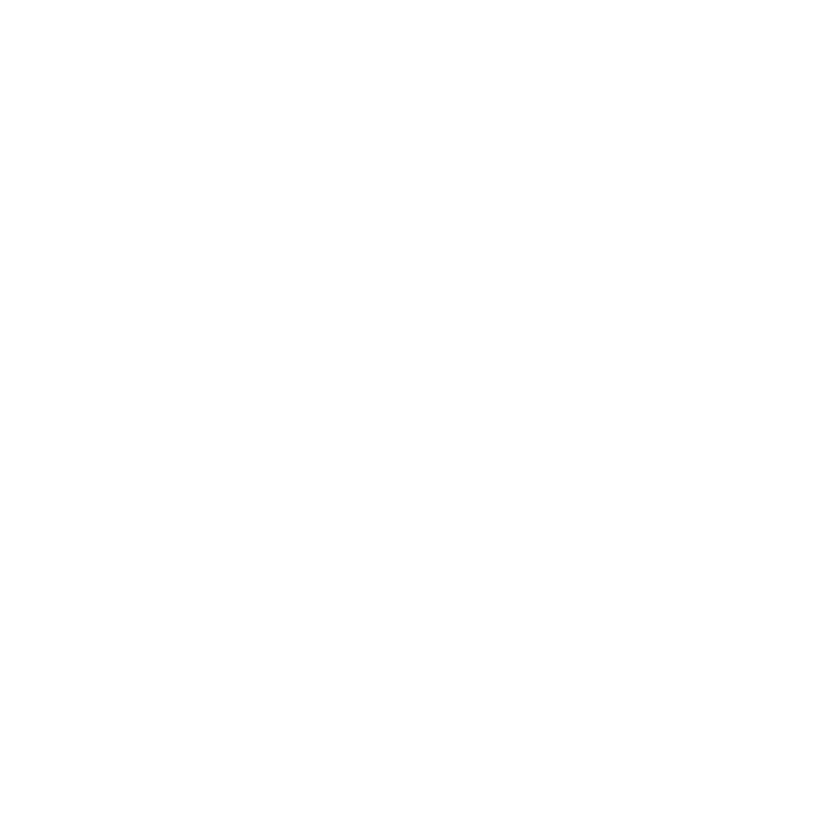

In [19]:
plot(y)

# scatterplot matrix

In [20]:
featurePlot(x=x, y=y, plot="ellipse")

ERROR: Error in featurePlot(x = x, y = y, plot = "ellipse"): could not find function "featurePlot"


# box and whisker plots for each attribute

In [21]:
featurePlot(x=x, y=y, plot="box")

ERROR: Error in featurePlot(x = x, y = y, plot = "box"): could not find function "featurePlot"


# density plots for each attribute by class value

In [22]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

ERROR: Error in featurePlot(x = x, y = y, plot = "density", scales = scales): could not find function "featurePlot"


# Run algorithms using 10-fold cross validation

In [23]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

ERROR: Error in trainControl(method = "cv", number = 10): could not find function "trainControl"


# a) linear algorithms

In [ ]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) nonlinear algorithms
# CART

In [24]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

ERROR: Error in train(Species ~ ., data = dataset, method = "rpart", metric = metric, : could not find function "train"


# kNN

In [28]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

ERROR: Error in train(Species ~ ., data = dataset, method = "knn", metric = metric, : could not find function "train"


# c) advanced algorithms
# SVM

In [29]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

ERROR: Error in train(Species ~ ., data = dataset, method = "svmRadial", metric = metric, : could not find function "train"


# Random Forest

In [30]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

ERROR: Error in train(Species ~ ., data = dataset, method = "rf", metric = metric, : could not find function "train"


# summarize accuracy of models

In [31]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

ERROR: Error in resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, : could not find function "resamples"


# compare accuracy of models

In [32]:
dotplot(results)

ERROR: Error in dotplot(results): could not find function "dotplot"


# summarize Best Model

In [33]:
print(fit.lda)

ERROR: Error in print(fit.lda): object 'fit.lda' not found


# estimate skill of LDA on the validation dataset

In [34]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

ERROR: Error in predict(fit.lda, validation): object 'fit.lda' not found
